In [1]:
import numpy as np
import umap
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

X = np.load("../EncodedData/cancer-pca-200.npy")
print(f"Shape: {X.shape}")

2025-10-29 21:21:03.290459: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Shape: (160000, 200)


In [2]:
# from tensorflow.keras.models import load_model

# encoder = load_model("../Models/Decoder/encoder.keras")
# X = encoder.predict(X)
# print(f"Shape: {X.shape}")
# del encoder

In [3]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(X)

print(f"UMAP embedding shape: {embedding.shape}")



/home/vmuser/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP embedding shape: (160000, 2)


In [4]:

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embedding)

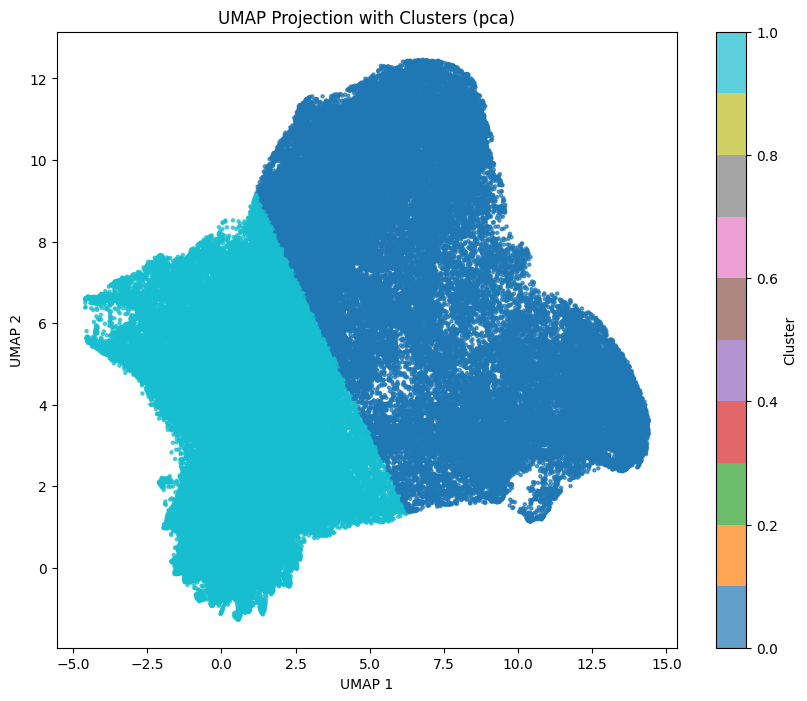

Found 2 clusters
Cluster distribution: [63288 96712]


In [5]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], 
                     c=cluster_labels, cmap='tab10', s=5, alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title("UMAP Projection with Clusters (pca)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

print(f"Found {n_clusters} clusters")
print(f"Cluster distribution: {np.bincount(cluster_labels)}")